In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 
import matplotlib.pyplot as plt
import os
import pickle
import random
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report as cr

**TRAINING DATA FEATURES EXTRACTION**

In [2]:
dir = 'chest_xray/train'

In [3]:
categories = ['NORMAL','PNEUMONIA']
data = []
for c in categories:
    path = os.path.join(dir,c)
    label = categories.index(c)
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        l_img = cv2.imread(imgpath,0)
        try:
            l_img = cv2.resize(l_img,(50,50))
            image = np.array(l_img).flatten()
            data.append([img,image,label])
        except:
            pass
im = []
for i in range(len(data)):
    im.append(data[i][0])

In [4]:
labels = []
for i in range(len(data)):
    labels.append(data[i][2])

In [5]:
mean_values=[]
for i in range(len(data)):
    mean = sum(data[i][1])//len(data)
    mean_values.append(mean)

In [6]:
import statistics
var = []
for i in range(len(data)):
    mean = sum(data[i][1])//len(data)
    v = statistics.variance(data[i][1],xbar = mean)
    var.append(v)

In [28]:
con = []
for i in range(len(data)):
    if(int((max(data[i][1])))+int(min(data[i][1]))!=0):
        contrast = (int(np.max(data[i][1]))-int(np.min(data[i][1])))/(int(np.max(data[i][1]))+int(np.min(data[i][1])))
        con.append(contrast)

In [8]:
from scipy.stats import entropy
E = []
for i in range(len(data)):
    e = entropy(data[i][1], base=2)
    E.append(e)

In [9]:
cols = [im,mean_values,var,con,E,labels]
df = pd.DataFrame(cols)
df1 = df.transpose()
df1.columns = ['image name','Mean', 'variance', 'contrast','entropy','labels']
df1['contrast'] = df1['contrast'].fillna(0)
print(df1)
file_name = open("im.csv",'w')
df1.to_csv('im.csv')

                    image name Mean variance  contrast    entropy labels
0            IM-0115-0001.jpeg   61     8481       1.0  11.078065      0
1            IM-0117-0001.jpeg   48     6346       1.0  10.969443      0
2            IM-0119-0001.jpeg   58     8819       1.0  10.965738      0
3            IM-0122-0001.jpeg   63     9086       1.0  11.055032      0
4            IM-0125-0001.jpeg   50     7356       1.0  10.925638      0
...                        ...  ...      ...       ...        ...    ...
5211   person99_virus_183.jpeg   55     7583       0.0  11.009311      1
5212  person9_bacteria_38.jpeg   63     7697       0.0  11.134955      1
5213  person9_bacteria_39.jpeg   61     6911       0.0  11.153747      1
5214  person9_bacteria_40.jpeg   69     8324       0.0  11.168676      1
5215  person9_bacteria_41.jpeg   55     5886       0.0  11.135897      1

[5216 rows x 6 columns]


**TEST DATA FEATURE EXTRACTION**

In [10]:
dir2 = 'chest_xray/test'

In [11]:
categories = ['NORMAL','PNEUMONIA']
tdata = []
for c in categories:
    path = os.path.join(dir2,c)
    label = categories.index(c)
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        l_img = cv2.imread(imgpath,0)
        try:
            l_img = cv2.resize(l_img,(50,50))
            image = np.array(l_img).flatten()
            tdata.append([img,image,label])
        except:
            pass
im2 = []
for i in range(len(tdata)):
    im2.append(tdata[i][0])

In [12]:
mean_values2=[]
for i in range(len(tdata)):
    mean = sum(tdata[i][1])//len(tdata)
    mean_values2.append(mean)

In [13]:
import statistics
var1 = []
for i in range(len(tdata)):
    mean = sum(tdata[i][1])//len(tdata)
    v = statistics.variance(tdata[i][1],xbar = mean)
    var1.append(v)

In [29]:
con1 = []
for i in range(len(tdata)):
    if(int((max(tdata[i][1]))+int(min(tdata[i][1])))!=0):
        contrast = (int(np.max(tdata[i][1]))-int(np.min(tdata[i][1])))/(int(np.max(tdata[i][1]))+int(np.min(tdata[i][1])))
        con1.append(contrast)

In [15]:
from scipy.stats import entropy
E1 = []
for i in range(len(tdata)):
    e = entropy(tdata[i][1], base=2)
    E1.append(e)

In [16]:
labels = []
for i in range(len(tdata)):
    labels.append(tdata[i][2])

In [17]:
cols = [im2,mean_values2,var1,con1,E1,labels]
print(len(cols))
df = pd.DataFrame(cols)
df1 = df.transpose()
df1.columns = ['image name','Mean', 'variance', 'contrast','entropy','labels']
df1['contrast'] = df1['contrast'].fillna(0)
print(df1)
file_name = open("im2.csv",'w')
df1.to_csv('im2.csv')

6
                     image name Mean variance   contrast    entropy labels
0             IM-0001-0001.jpeg  523   157163   0.912698  11.129232      0
1             IM-0003-0001.jpeg  571   187320  18.230770  11.134711      0
2             IM-0005-0001.jpeg  545   170223  48.200001  11.150993      0
3             IM-0006-0001.jpeg  596   201831   0.991342  11.225787      0
4             IM-0007-0001.jpeg  551   173834  20.000000  11.164621      0
..                          ...  ...      ...        ...        ...    ...
619  person96_bacteria_465.jpeg  501   145343   0.000000  11.060364      1
620  person96_bacteria_466.jpeg  499   143599   0.000000  11.095107      1
621  person97_bacteria_468.jpeg  559   179596   0.000000   11.10576      1
622  person99_bacteria_473.jpeg  526   158087   0.000000  11.165797      1
623  person99_bacteria_474.jpeg  502   145803   0.000000  11.035013      1

[624 rows x 6 columns]


**MACHINE LEARNING CLASSIFIERS**

In [18]:
Train = pd.read_csv('im.csv')

In [19]:
X_tr = Train[['Mean','variance','contrast','entropy']]
arr = X_tr.to_numpy()
Y_tr = Train[['labels']]
arr = Y_tr.to_numpy()

In [20]:
Test = pd.read_csv('im2.csv')

In [21]:
X_te = Test[['Mean','variance','contrast','entropy']]
arr = X_te.to_numpy()
Y_te = Test[['labels']]
arr = Y_te.to_numpy()

In [39]:
import warnings
warnings.filterwarnings('ignore')
classifiers = {}
model = KNN(500)
model.fit(X_tr,Y_tr.values.ravel())
pred = model.predict(X_te)
print(cr(pred,Y_te))
report = cr(pred,Y_te,output_dict = True)
df = pd.DataFrame(report).transpose()
classifiers["K-Nearest Neigbour"] = df.iloc[2][2]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.77       624

    accuracy                           0.62       624
   macro avg       0.50      0.31      0.38       624
weighted avg       1.00      0.62      0.77       624



In [40]:
model = RFC()
model.fit(X_tr,Y_tr.values.ravel())
pred = model.predict(X_te)
print(cr(pred, Y_te))
report = cr(pred,Y_te,output_dict = True)
df = pd.DataFrame(report).transpose()
classifiers["Random Forest"] = df.iloc[2][2]

              precision    recall  f1-score   support

           0       0.03      0.27      0.06        30
           1       0.94      0.62      0.75       594

    accuracy                           0.60       624
   macro avg       0.49      0.44      0.40       624
weighted avg       0.90      0.60      0.71       624



In [43]:
model = DecisionTreeClassifier()
model.fit(X_tr,Y_tr)
pred = model.predict(X_te)
print(cr(pred, Y_te))
report = cr(pred,Y_te,output_dict = True)
df = pd.DataFrame(report).transpose()
classifiers["Decision Tree classifier"] = df.iloc[2][2]

              precision    recall  f1-score   support

           0       0.05      0.26      0.08        42
           1       0.92      0.62      0.74       582

    accuracy                           0.59       624
   macro avg       0.48      0.44      0.41       624
weighted avg       0.86      0.59      0.69       624

{'K-Nearest Neigbour': 0.5897435897435898, 'Random Forest': 0.6025641025641025, 'Gaussian Naive Bayes': 0.625, 'Decision Tree classifier': 0.592948717948718}


In [44]:
import warnings
warnings.filterwarnings('ignore')
model = GaussianNB()
model.fit(X_tr,Y_tr.values.ravel())
pred = model.predict(X_te)
print(cr(pred, Y_te))
report = cr(pred,Y_te,output_dict = True)
df = pd.DataFrame(report).transpose()
classifiers["Gaussian Naive Bayes"] = df.iloc[2][2]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.77       624

    accuracy                           0.62       624
   macro avg       0.50      0.31      0.38       624
weighted avg       1.00      0.62      0.77       624



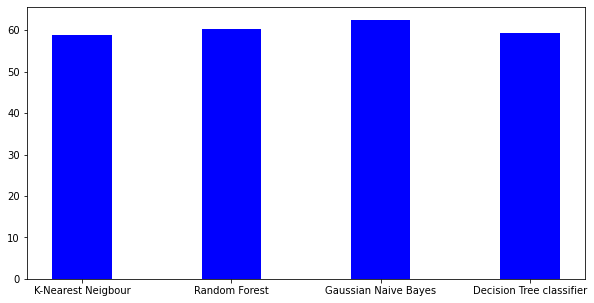

In [57]:
courses = list(classifiers.keys())
values = list(classifiers.values())

percentages = [i*100 for i in values]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, percentages, color ='blue',
        width = 0.4)
plt.show() 